#### [Tache1.0][5pts] Repérer et nettoyer le jeu de données des valeurs problématiques

##### Importation des bibliothèques

In [102]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts')
from preprocess import clear_missing_data, percent_data, visualize, delete_data, impute_data, compare_dist


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Chargement du dataset

In [103]:
# Je charge le dataset en ne prenant que les 1000 premières lignes afin de tester les fonctions
path = "../data/dataset.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=1000, sep=',',encoding="utf-8")

In [104]:
# Je vérifie que le dataset a bien été chargé ainsi que sa taille
df.shape

(1000, 207)

##### Suppresion des colonnes vides

In [105]:
# Je supprime les colonnes avec données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 73


In [106]:
# Je vérifie le nombre de colonnes supprimées
df.shape

(1000, 134)

##### Suppresion des colonnes avec 70% de données manquantes

In [107]:
# Je vérifie le pourcentage de colonnes avec plus de 70% de données manquantes
columns_to_drop_details, threshold = percent_data(df, threshold=70)

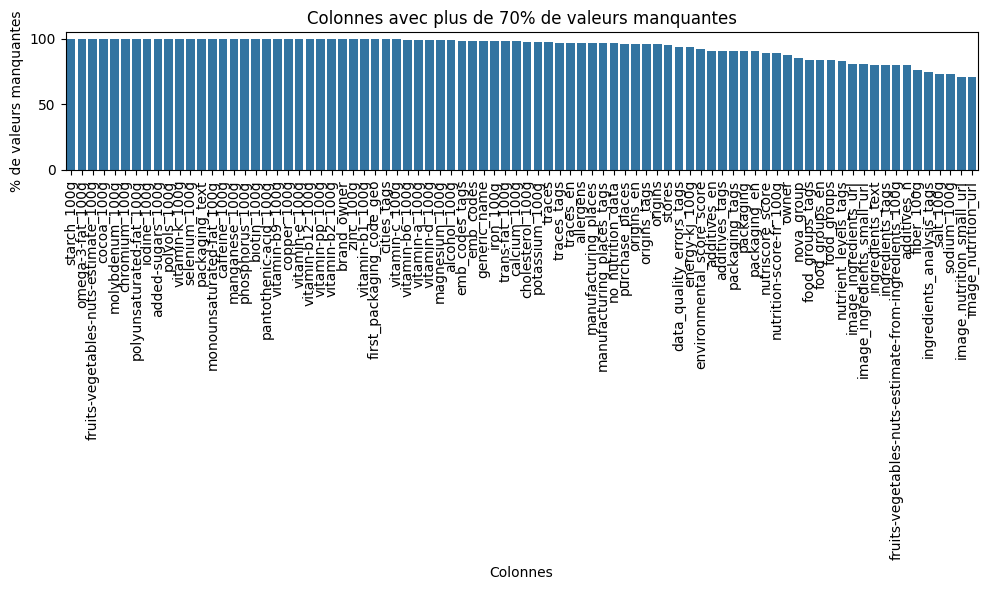

In [108]:
# je visualise le nombre de colonnes à supprimer
df = visualize(df, columns_to_drop_details, threshold)


In [109]:
# je verifie le nombre de colonnes avant la suppression
df.shape

(1000, 134)

In [110]:
# je compte le nombre de colonnes à supprimer
count_columns_to_drop = len(columns_to_drop_details)
print(count_columns_to_drop)

84


In [111]:
# je supprime les colonnes avec plus de 70% de données manquantes
df = delete_data(df, columns_to_drop_details.index)

In [112]:
# je verifie le nombre de colonnes après la suppression
df.shape


(1000, 50)

##### Suppression des colonnes non pertinentes

In [113]:
#je verifie le nombre de colonnes total avant modification
df.shape

(1000, 50)

In [114]:
# je sélectionne les colonnes avec des données non pertinentes
columns_to_drop = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
             'last_modified_datetime','last_modified_by', 'last_updated_t',
             'last_updated_datetime', 'generic_name', 'image_url', 'image_small_url',
             'image_ingredients_url','image_ingredients_small_url', 'image_nutrition_url',
             'image_nutrition_small_url','last_image_datetime', 'last_image_t','Unnamed: 0']

In [115]:
# je supprime les colonnes non pertinentes
df = delete_data(df,columns_to_drop)

In [116]:
# je verifie le nombre de colonnes total après modification
df.shape

(1000, 36)

#### Imputation des variables numériques

In [117]:
 # je verifie les colonnes numériques avant imputation 
df

,code,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,completeness,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,54,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,0.4750,NaN,NaN,NaN,2415.0,44.0,28.0,30.00,27.0,7.10
3,1,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,0.8625,en:vegtable,Vegtable,209.0,874.0,6.0,1.0,21.40,11.1,11.20
4,105,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,...,0.6750,en:beverages,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.3750,en:tea-bags,Tea bags,0.0,0.0,0.0,0.0,60.00,0.0,0.00
996,105000073,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,...,0.4000,NaN,NaN,267.0,1117.0,0.0,NaN,60.00,NaN,66.67
997,105000196,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.5000,en:teas,Teas,0.0,0.0,0.0,NaN,60.00,NaN,66.67
998,105000219,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.5000,en:tea-bags,Tea bags,0.0,0.0,0.0,NaN,2.67,NaN,0.00


In [118]:
df

,code,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,completeness,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,54,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,0.4750,NaN,NaN,NaN,2415.0,44.0,28.0,30.00,27.0,7.10
3,1,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,0.8625,en:vegtable,Vegtable,209.0,874.0,6.0,1.0,21.40,11.1,11.20
4,105,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,...,0.6750,en:beverages,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.3750,en:tea-bags,Tea bags,0.0,0.0,0.0,0.0,60.00,0.0,0.00
996,105000073,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,...,0.4000,NaN,NaN,267.0,1117.0,0.0,NaN,60.00,NaN,66.67
997,105000196,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.5000,en:teas,Teas,0.0,0.0,0.0,NaN,60.00,NaN,66.67
998,105000219,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,...,0.5000,en:tea-bags,Tea bags,0.0,0.0,0.0,NaN,2.67,NaN,0.00


In [119]:
# J'impute les données manquantes

df_original, df_imputed = impute_data(df) 


In [120]:
df_imputed

,code,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,completeness,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,54,Limonade artisanale a la rose,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.2,en:beverages,Beverages,231.6,973.0,3.6,1.0,47.5,17.5,19.9
1,63,Tablette Tanzanie,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.3,en:beverages,Beverages,334.1,1397.8,15.7,2.8,11.9,4.4,32.2
2,114,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,0.5,en:beverages,Beverages,576.9,2415.0,44.0,28.0,30.0,27.0,7.1
3,1,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,0.9,en:vegtable,Vegtable,209.0,874.0,6.0,1.0,21.4,11.1,11.2
4,105,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.7,en:beverages,Beverages,246.0,1028.0,12.3,3.6,36.4,16.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,Herbal Tea Cinnamon,700ml,Phillips Gourmet,phillips-gourmet,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:tea-bags,Tea bags,0.0,0.0,0.0,0.0,60.0,0.0,0.0
996,105000073,"Herbal Tea, Hibiscus",700ml,Lagg's,lagg-s,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:beverages,Beverages,267.0,1117.0,0.0,2.9,60.0,4.1,66.7
997,105000196,Apple & Cinnamon Tea,700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:teas,Teas,0.0,0.0,0.0,2.9,60.0,4.1,66.7
998,105000219,"Lagg's, green tea",700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:tea-bags,Tea bags,0.0,0.0,0.0,2.9,2.7,4.1,0.0


In [121]:
# Je vérifie les colonnes numériques après imputation.
df_imputed

,code,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,completeness,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,54,Limonade artisanale a la rose,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.2,en:beverages,Beverages,231.6,973.0,3.6,1.0,47.5,17.5,19.9
1,63,Tablette Tanzanie,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.3,en:beverages,Beverages,334.1,1397.8,15.7,2.8,11.9,4.4,32.2
2,114,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,0.5,en:beverages,Beverages,576.9,2415.0,44.0,28.0,30.0,27.0,7.1
3,1,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,0.9,en:vegtable,Vegtable,209.0,874.0,6.0,1.0,21.4,11.1,11.2
4,105,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.7,en:beverages,Beverages,246.0,1028.0,12.3,3.6,36.4,16.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,Herbal Tea Cinnamon,700ml,Phillips Gourmet,phillips-gourmet,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:tea-bags,Tea bags,0.0,0.0,0.0,0.0,60.0,0.0,0.0
996,105000073,"Herbal Tea, Hibiscus",700ml,Lagg's,lagg-s,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:beverages,Beverages,267.0,1117.0,0.0,2.9,60.0,4.1,66.7
997,105000196,Apple & Cinnamon Tea,700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:teas,Teas,0.0,0.0,0.0,2.9,60.0,4.1,66.7
998,105000219,"Lagg's, green tea",700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:tea-bags,Tea bags,0.0,0.0,0.0,2.9,2.7,4.1,0.0


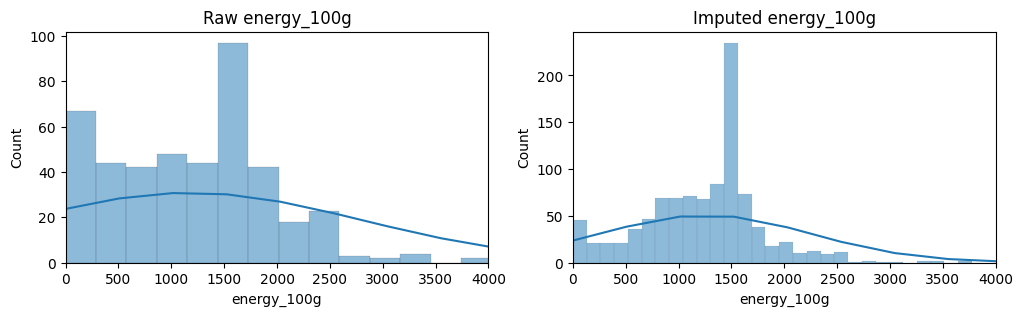

In [122]:
# je compare les données avant et après imputation
feature = "energy_100g"
fig = compare_dist(df_original, df_imputed, feature)  
plt.show()

In [123]:
import scipy.sparse as sp

sample_col = "brands"  # Remplace par une colonne catégorielle présente dans ton dataset
encoded_matrix = sp.load_npz(f"encoded_features/{sample_col}.npz")

print(f"Shape de la matrice encodée pour {sample_col}:", encoded_matrix.shape)
print("Aperçu des 5 premières lignes :\n", encoded_matrix[:5].toarray())


Shape de la matrice encodée pour brands: (1000, 9)
Aperçu des 5 premières lignes :
 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [124]:
df_imputed

,code,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,completeness,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,54,Limonade artisanale a la rose,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.2,en:beverages,Beverages,231.6,973.0,3.6,1.0,47.5,17.5,19.9
1,63,Tablette Tanzanie,700ml,Phillips Gourmet,phillips-gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.3,en:beverages,Beverages,334.1,1397.8,15.7,2.8,11.9,4.4,32.2
2,114,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,0.5,en:beverages,Beverages,576.9,2415.0,44.0,28.0,30.0,27.0,7.1
3,1,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,0.9,en:vegtable,Vegtable,209.0,874.0,6.0,1.0,21.4,11.1,11.2
4,105,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.7,en:beverages,Beverages,246.0,1028.0,12.3,3.6,36.4,16.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,Herbal Tea Cinnamon,700ml,Phillips Gourmet,phillips-gourmet,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:tea-bags,Tea bags,0.0,0.0,0.0,0.0,60.0,0.0,0.0
996,105000073,"Herbal Tea, Hibiscus",700ml,Lagg's,lagg-s,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.4,en:beverages,Beverages,267.0,1117.0,0.0,2.9,60.0,4.1,66.7
997,105000196,Apple & Cinnamon Tea,700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:teas,Teas,0.0,0.0,0.0,2.9,60.0,4.1,66.7
998,105000219,"Lagg's, green tea",700ml,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.5,en:tea-bags,Tea bags,0.0,0.0,0.0,2.9,2.7,4.1,0.0


In [147]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scalLing import standardization, min_max_scaling, robust_scaling, max_abs_scaling

# Load your dataset
# df_imputed = pd.read_csv('path_to_your_dataset.csv')

# Supposons que df_imputed soit votre DataFrame
# Sélectionnez uniquement les colonnes numériques
numeric_columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_imputed[numeric_columns]

# Fonction pour visualiser une caractéristique avant et après scaling
def plot_feature_scaling(feature):
    if feature not in df_numeric.columns:
        print(f"Feature '{feature}' not found in numeric columns.")
        return

    # Apply Scaling
    standardized_data = standardization(df_numeric[[feature]])
    min_max_scaled_data = min_max_scaling(df_numeric[[feature]])
    robust_scaled_data = robust_scaling(df_numeric[[feature]])
    max_abs_scaled_data = max_abs_scaling(df_numeric[[feature]])

    # Visualize the original and scaled data for the selected feature
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

    # Original Data
    df_numeric[feature].hist(ax=axes[0], bins=30)
    axes[0].set_title(f'Original Data\n{feature}')

    # Standardized Data
    standardized_data.hist(ax=axes[1], bins=30)
    axes[1].set_title('Standardized Data')

    # Min-Max Scaled Data
    min_max_scaled_data.hist(ax=axes[2], bins=30)
    axes[2].set_title('Min-Max Scaled Data')

    # Robust Scaled Data
    robust_scaled_data.hist(ax=axes[3], bins=30)
    axes[3].set_title('Robust Scaled Data')

    # MaxAbs Scaled Data
    max_abs_scaled_data.hist(ax=axes[4], bins=30)
    axes[4].set_title('MaxAbs Scaled Data')

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation : remplacez 'your_feature_name' par le nom de la caractéristique que vous souhaitez visualiser
plot_feature_scaling('fat_100g')


ModuleNotFoundError: No module named 'scalLing'